Anzahl der Duplikate der Output-Werte: 2871
Anzahl der Input-Werte: 258200
Anzahl der belegten Plätze von 100.000: 98518


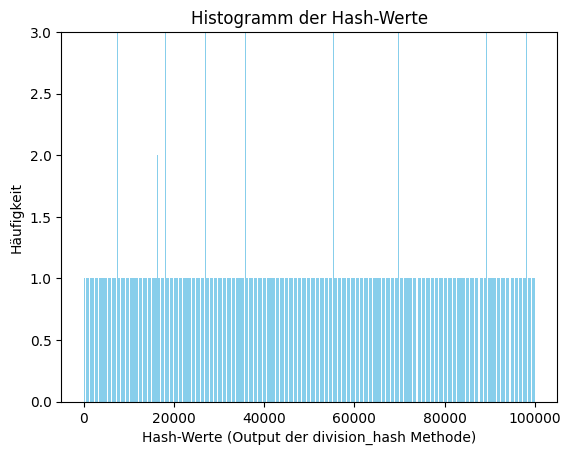

In [1]:
import csv
import matplotlib.pyplot as plt
import math
import numpy as np

# Hashfunktionen
def key_Wert(input_Wert):
    return sum(ord(buchstabe) for buchstabe in input_Wert)

def division_hash(input_key: int, hashsize, max_recursion=1031, current_recursion=0):
    hash_value = input_key % hashsize
    
    if hash_value in hash_values and current_recursion < max_recursion:
        return division_hash(hash_value * 31, hashsize, max_recursion, current_recursion + 1)
    return hash_value


# CSV-Datei lesen
def read_csv_file(file_path):
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        csv_reader = csv.reader(file)
        return [row for row in csv_reader]

file_path = "/Users/furkan/Downloads/archive/de_DE.csv"
hashsize = 100000
rows = read_csv_file(file_path)

hash_values = {} 
input_count: int = 0
for row in rows:
    word = str(row[0])
    input_count += 1
    key = key_Wert(word)
    hashwert = division_hash(key, hashsize)
    hash_values[hashwert] = hash_values.get(hashwert, 0) + 1

# Sammeln der Hash-Werte in einer Liste
hash_values_list = list(hash_values.keys())

duplicate_count = sum(1 for count in hash_values.values() if count > 1)

print(f"Anzahl der Duplikate der Output-Werte: {duplicate_count}")
print(f"Anzahl der Input-Werte: {input_count}")

# Erstellen eines Sets aus den Hash-Werten
unique_hash_values = set(hash_values_list)

# Ausgeben der Anzahl der einzigartigen Hash-Werte
print(f"Anzahl der belegten Plätze von 100.000: {len(unique_hash_values)}")

plt.bar(hash_values.keys(), hash_values.values(), color='skyblue')
plt.xlabel('Hash-Werte (Output der division_hash Methode)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Hash-Werte')
plt.ylim(0, 3)
plt.show()


